In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
# Importing data
path = "/content/drive/MyDrive/project/"
data_train = pd.read_csv(path + "train.csv")
data_train.head()
data_train.shape

(14999, 9)

In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
#Removing character "F" from data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
     if i not in P:
        mm+=i
     else:
           if(i=="H"):
              h = mm
              mm = ''
           elif(i == "M"):
              m = mm
              mm = ''
           else:
              s = mm
              mm = ''
 if(h==''):
       h = '00'
 if(m == ''):
       m = '00'
 if(s==''):
        s='00'
 bp = h+':'+m+':'+s
 return bp
train=pd.read_csv("/content/drive/MyDrive/project/train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
 h, m, s = time_string.split(':')
 return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head() 

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


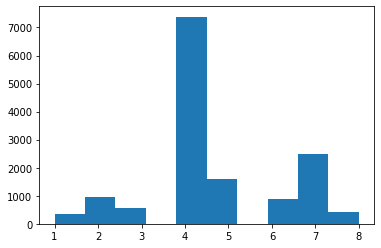

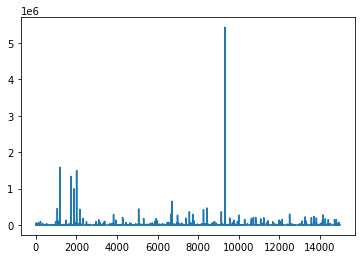

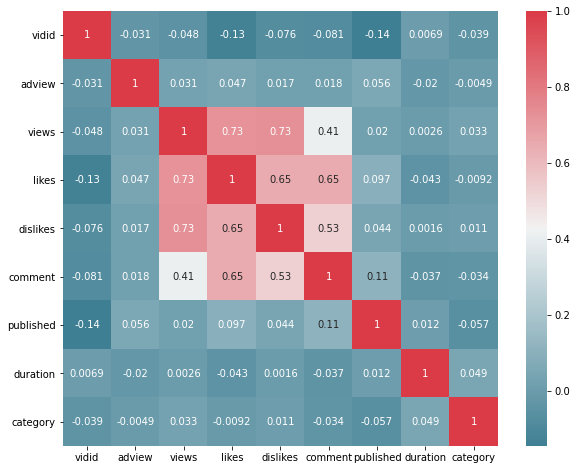

In [ ]:
# Visualization
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
 #Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
 prediction = model_name.predict(X_test)
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test,Y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test,Y_test, decision_tree)

Mean Absolute Error: 2790.0457650273224
Mean Squared Error: 901211033.4610655
Root Mean Squared Error: 30020.17710575781


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train, Y_train)
print_error(X_test,Y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3326.5182385636626
Mean Squared Error: 649261686.5734112
Root Mean Squared Error: 25480.61393635191


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                               Dense(6, activation="relu",
                               input_shape=X_train.shape[1:]),
                               Dense(6,activation="relu"),
                               Dense(1)
                              ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,Y_train,epochs=45)
ann.summary()
print_error(X_test,Y_test,ann)

Epoch 1/45
366/366 [==============================] - 0s 873us/step - loss: 767405760.0000 - mean_squared_error: 767405760.0000
Epoch 2/45
366/366 [==============================] - 0s 882us/step - loss: 767400704.0000 - mean_squared_error: 767400704.0000
Epoch 3/45
366/366 [==============================] - 0s 884us/step - loss: 767383616.0000 - mean_squared_error: 767383616.0000
Epoch 4/45
366/366 [==============================] - 0s 857us/step - loss: 767353344.0000 - mean_squared_error: 767353344.0000
Epoch 5/45
366/366 [==============================] - 0s 861us/step - loss: 767311616.0000 - mean_squared_error: 767311616.0000
Epoch 6/45
366/366 [==============================] - 0s 829us/step - loss: 767256960.0000 - mean_squared_error: 767256960.0000
Epoch 7/45
366/366 [==============================] - 0s 891us/step - loss: 767188672.0000 - mean_squared_error: 767188672.0000
Epoch 8/45
366/366 [==============================] - 0s 862us/step - loss: 767110208.0000 - mean_square

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest, "random_forest_youtubeadview.pkl")


# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
# test file

In [ ]:
#upload file
path = '‪/content/drive/MyDrive/project/test (1).csv'
data_test = pd.read_csv("/content/drive/MyDrive/project/test (1).csv")
data_test.head()
data_test.shape

(8764, 8)

In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
#Removing character "F" from data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# Convert values to integers for views, likes, comments and dislikes
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
     if i not in P:
        mm+=i
     else:
           if(i=="H"):
              h = mm
              mm = ''
           elif(i == "M"):
              m = mm
              mm = ''
           else:
              s = mm
              mm = ''
 if(h==''):
       h = '00'
 if(m == ''):
       m = '00'
 if(s==''):
        s='00'
 bp = h+':'+m+':'+s
 return bp
test=pd.read_csv("/content/drive/MyDrive/project/test (1).csv")
mp = pd.read_csv("/content/drive/MyDrive/project/test (1).csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
 h, m, s = time_string.split(':')
 return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head() 

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


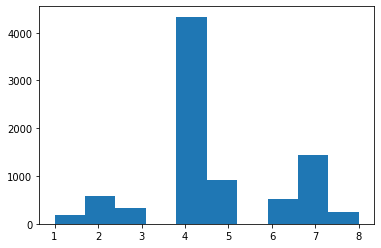

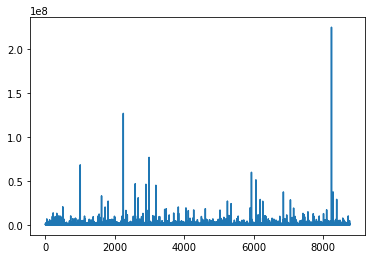

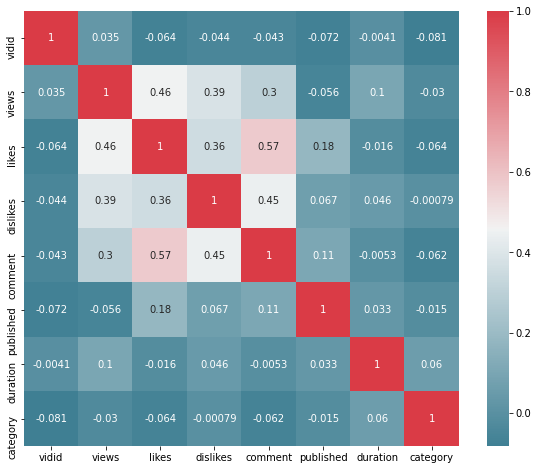

In [ ]:
# Visualization
plt.hist(data_test["category"])
plt.show()
plt.plot(data_test["views"])
plt.show()

data_test = data_test[data_test["views"] <80000]


# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_test.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Split Data
y_train = pd.DataFrame(data = data_test.iloc[:,1].values, columns = ['target'])
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()


,views,likes,dislikes,comment,published,duration,category
2,28534,31,11,1,1009,2274,4
6,12921,169,3,73,1060,604,4
7,4502,65,2,8,1840,155,6
12,10954,243,9,3,1793,104,7
13,3325,9,1,0,791,256,4


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_test, y_train, test_size=0.2, random_state=42)
x_train.shape

(2615, 7)

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_test.mean()

0.2326644881230601

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(x_test, y_test, model_name):
 prediction = model_name.predict(x_test)
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# import file
import joblib
classifier = joblib.load( "random_forest_youtubeadview.pkl")
data_test = scaler.fit_transform(data_test)
adviews = classifier.predict(data_test)

In [ ]:
pred = np.asarray(adviews)

In [ ]:
print(pred)

[ 26451.98908942  25655.28951431    424.48714924 ...   1876.76002686
  26426.22456556 171747.86061717]


In [ ]:
pred.shape

(3269,)

In [ ]:
#save predictions into .csv file
a = np.asarray(adviews)
np.savetxt("Predictions1.csv", pred,delimiter=',' )
print("Prediction successful")


Prediction successful
